<a href="https://colab.research.google.com/github/Mary-prh/NLP_Project/blob/main/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Replicating the deep learning model behind the 2017 paper PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts.

When it was released, the paper presented a new dataset called PubMed 200k RCT which consists of ~200,000 labelled Randomized Controlled Trial (RCT) abstracts.

The goal of the dataset was to explore the ability for NLP models to classify sentences which appear in sequential order.

https://arxiv.org/pdf/1710.06071.pdf 

# **Getting the data**

In [1]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [2]:
# Check what files are in the PubMed_20K dataset 
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [3]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

# **Data Exploratory and Pre-processing**

## **function to read the lines of a document**

In [4]:
# Create function to read the lines of a document
def read_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """
  with open(filename, "r") as f:
    return f.readlines()

In [5]:
train_lines = read_lines(data_dir + "train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

## **Function to split the lines**


---
`"line_number"` - the position of the line in the abstract (e.g. 3).

`"target"` - the role of the line in the abstract (e.g. OBJECTIVE).

`"text"` - the text of the line in the abstract.

`"total_lines"` - the total lines in an abstract sample (e.g. 14).


In [6]:
def preprocess_text(filename):
  Input_lines = read_lines(filename)
  abstract_line = ""
  abstract_sample =[]

  for lines in Input_lines:
    if lines.startswith("###"):
      abstract_id = lines
      abstract_line = ""
    elif lines.isspace(): # line is a new line
      abstract_line_split = abstract_line.splitlines()
      for line_number , line_info in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = line_info.split("\t")
        line_data["Target"] = target_text_split[0]
        line_data["Text"]= target_text_split[1].lower()
        line_data["line_number"] = line_number
        line_data["Total_line_number"]= len(abstract_line_split)-1
        abstract_sample.append(line_data)
    else:
      abstract_line += lines
  return abstract_sample
  

## **Turning data into dataframe**

In [7]:
test_samples = preprocess_text(filename= data_dir + "test.txt")
train_samples = preprocess_text(filename= data_dir + "train.txt")
validation_samples = preprocess_text(filename= data_dir + "dev.txt")

In [8]:
train_samples[:14]

[{'Target': 'OBJECTIVE',
  'Text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'Total_line_number': 11,
  'line_number': 0},
 {'Target': 'METHODS',
  'Text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'Total_line_number': 11,
  'line_number': 1},
 {'Target': 'METHODS',
  'Text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'Total_line_number': 11,
  'line_number': 2},
 {'Target': 'METHODS',
  'Text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'Total_line_number': 11,
  'line_number': 3},
 {'Target': 'METHODS',
  'Text': 'secondary outcome measures inc

In [9]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
validation_df =pd.DataFrame(validation_samples)
test_df = pd.DataFrame(test_samples)

In [10]:
test_df.head(15)

,Target,Text,line_number,Total_line_number
0,BACKGROUND,this study analyzed liver function abnormaliti...,0,8
1,RESULTS,a post hoc analysis was conducted with the use...,1,8
2,RESULTS,liver function tests ( lfts ) were measured at...,2,8
3,RESULTS,survival analyses were used to assess the asso...,3,8
4,RESULTS,the percentage of patients with abnormal lfts ...,4,8
5,RESULTS,when mean hemodynamic profiles were compared i...,5,8
6,RESULTS,multivariable analyses revealed that patients ...,6,8
7,CONCLUSIONS,abnormal lfts are common in the adhf populatio...,7,8
8,CONCLUSIONS,elevated meld-xi scores are associated with po...,8,8
9,BACKGROUND,minimally invasive endovascular aneurysm repai...,0,12


In [11]:
test_df["Target"].value_counts()

METHODS        9897
RESULTS        9713
CONCLUSIONS    4571
BACKGROUND     3621
OBJECTIVE      2333
Name: Target, dtype: int64

## **Explore the dataframe**

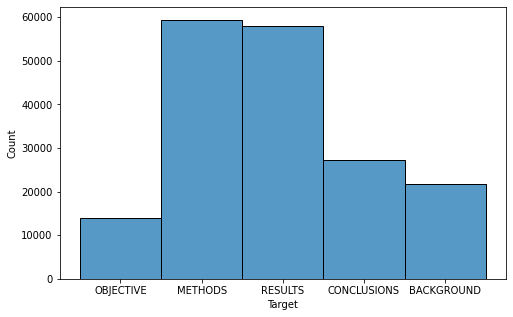

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
sns.histplot(data = train_df, x= "Target")

In [13]:
mean = train_df["Total_line_number"].mean(axis = 0)

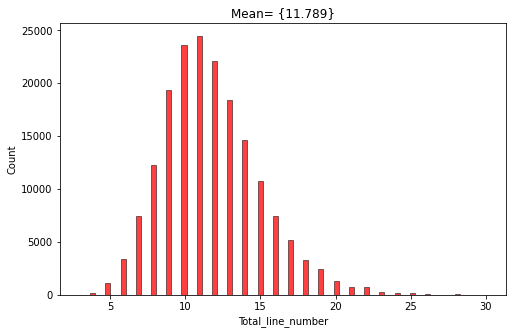

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(data = train_df, x= "Total_line_number" ,bins=80, color = "red")
plt.title("Mean= {%1.3f}" %mean)
plt.show()

***Convert abstract text lines into lists***

In [15]:
train_text = train_df["Text"].tolist()
test_text = test_df["Text"].tolist()
validation_text= validation_df["Text"].tolist()

In [16]:
len(train_text) , len(test_text) , len(validation_text)

(180040, 30135, 30212)

## **Make numeric labels**

**One-Hot Encoding**

In [17]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

encoder_onehot = OneHotEncoder(sparse=False)
lables_onehot_train = encoder_onehot.fit_transform(train_df["Target"].to_numpy().reshape(-1, 1))
lables_onehot_test = encoder_onehot.transform(test_df["Target"].to_numpy().reshape(-1, 1))
lables_onehot_validation = encoder_onehot.transform(validation_df["Target"].to_numpy().reshape(-1, 1))
lables_onehot_train

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
# lables_onehot_train = tf.constant(lables_onehot_train)
# lables_onehot_train

**Label Encoding**

---

**This is useful to get back from the labels to the `actual class names`**

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder_labels = LabelEncoder()
labels_train = encoder_labels.fit_transform(train_df["Target"].to_numpy())
labels_test = encoder_labels.transform(test_df["Target"].to_numpy())
labels_validation = encoder_labels.transform(validation_df["Target"].to_numpy())


In [20]:
labels_train

array([3, 2, 2, ..., 4, 1, 1])

**class names**

In [21]:
class_names = encoder_labels.classes_
len(class_names) , class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

# **Evaluation function**

In [22]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
def calculate_results(y_test, y_pred):
  report = classification_report(y_test ,y_pred , output_dict=True)["weighted avg"]
  accuracy = accuracy_score(y_test ,y_pred )
  model_results = {"accuracy": accuracy,
                  "precision": report['precision'],
                  "recall": report['recall'],
                  "f1": report['f1-score']}
  print("Confusion Matrix Result: \n" ,confusion_matrix(y_test ,y_pred))
  print("\n")
  return model_results

# **Model_0: Naive Bayes**

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline

In [24]:
tf_idf = TfidfVectorizer()
NB_Model = MultinomialNB()
model_0= Pipeline([("TFIDF", tf_idf),("NB", NB_Model)])

In [25]:
model_0.fit(train_text, labels_train)

Pipeline(steps=[('TFIDF', TfidfVectorizer()), ('NB', MultinomialNB())])

In [26]:
preds_0 = model_0.predict(validation_text)

In [27]:
len(preds_0) , len(labels_validation)

(30212, 30212)

In [28]:
# for i in pred:
#   cls = class_names[i]
#   print(cls)

In [29]:
preds_0[0]

4

In [30]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

result_0 = calculate_results(labels_validation, preds_0)
result_0

Confusion Matrix Result: 
 [[1683  794  694   97  181]
 [ 244 2687  432    5 1214]
 [ 116   75 8670    7 1096]
 [ 505  422  978  325  146]
 [  20  181 1196    1 8443]]




{'accuracy': 0.7218323844829869,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

# **Vectorization and Embedding Layers**

## **Tokenizer**

In [31]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

**All the batches need to have the same dimension**

In [32]:
from statistics import mean
L = []
for i in train_text:
  L.append(len(i.split()))
# Mean = sum(L)/len(L)
ave_length = mean(L)

ave_length 

26.338269273494777

In [33]:
L[:2] , len(L)

([49, 27], 180040)

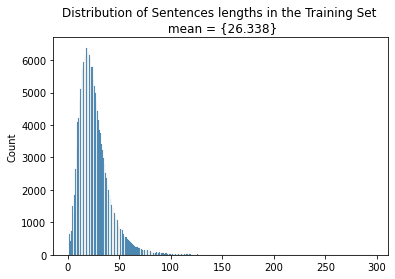

In [34]:
sns.histplot(L)
plt.title("Distribution of Sentences lengths in the Training Set \n mean = {%1.3f}" %ave_length)
plt.show()

*How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))*

In [35]:
import numpy as np
output_length = int(np.percentile(L, 95))
output_length

55

In [36]:
max(L) # so 55 is covering 95% of the text length which is a good estimation for the data

296

**max number of words to have in our vocabulary**

In [37]:
max_token_length = 68000 # this is coming from the paper: https://arxiv.org/pdf/1710.06071.pdf

In [38]:
tokenizer = TextVectorization(max_tokens=max_token_length,
                              output_sequence_length=output_length)

In [39]:
# Adapt text vectorizer to training sentences (it should be fitted to training data only)
tokenizer.adapt(train_text)

In [40]:
# test it out
import random

test_sentence = random.choices(train_text)
sentence_token = tokenizer(test_sentence)
print(test_sentence)
print(f"\nLength of text: {len(test_sentence[0].split())}")
print(sentence_token)

['a new gel formulation containing loteprednol etabonate ( le ) , a c-@ ester corticosteroid used to treat ocular inflammation , was developed to provide increased retention on the ocular surface for improved drug delivery to intraocular tissues .']

Length of text: 39
tf.Tensor(
[[    8   319  1543  1501   866 14794 14996  5065     8   243  9714  2139
     98     6   733  1667   636    10   481     6   414    96  1096    18
      2  1667  1384    11   170   300   479     6  1944  3254     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]], shape=(1, 55), dtype=int64)


In [41]:
words = tokenizer.get_vocabulary()

len(words)

64841

## **Embedding**

In [42]:
from tensorflow.keras.layers import Embedding

In [43]:
Embedding_Layer = Embedding(input_dim=  len(words), output_dim= 128, 
                            input_length = output_length, mask_zero=True) 
# Mask_zero=True helps to mask zeros and have more efficient computing

In [44]:
test_embed = Embedding_Layer(sentence_token)
test_embed 

<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.00226339, -0.02438213, -0.00532881, ..., -0.02443404,
         -0.02219814, -0.01857519],
        [-0.0453538 ,  0.04444889,  0.03200991, ...,  0.01698044,
         -0.02448863,  0.02196156],
        [ 0.02907595,  0.03642658, -0.04324131, ..., -0.01689442,
         -0.03530573,  0.02896971],
        ...,
        [-0.01703305, -0.01525018,  0.03818074, ..., -0.04439925,
         -0.03968687,  0.01920528],
        [-0.01703305, -0.01525018,  0.03818074, ..., -0.04439925,
         -0.03968687,  0.01920528],
        [-0.01703305, -0.01525018,  0.03818074, ..., -0.04439925,
         -0.03968687,  0.01920528]]], dtype=float32)>

# **Create datasets (to let tensorflow run as fast as possible)**


---

*The main steps we'll want to use with our data is to turn it into a `PrefetchDataset` of `batches`.

Doing so we'll ensure TensorFlow loads our data onto the GPU as fast as possible, in turn leading to faster training time.

To create a batched PrefetchDataset we can use the methods `batch()` and `prefetch()`, the parameter `tf.data.AUTOTUNE` will also allow TensorFlow to determine the optimal amount of compute to use to prepare datasets.*

**Turn our data into TensorFlow Datasets**

In [45]:
np.shape(train_text) , np.shape(test_text)

((180040,), (30135,))

In [48]:
train_data = tf.data.Dataset.from_tensor_slices((train_text, lables_onehot_train))
test_data = tf.data.Dataset.from_tensor_slices((test_text,lables_onehot_test))
validation_data = tf.data.Dataset.from_tensor_slices((validation_text, lables_onehot_validation))
train_data

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [49]:
train_data = train_data.batch(32).prefetch(buffer_size= tf.data.AUTOTUNE)
test_data= test_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
train_data , validation_data , test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

# **Model_1: CONV 1D (with token embeddings)**

In [51]:
from tensorflow.keras.layers import Conv1D , GlobalAveragePooling1D , Dense

In [52]:
Embedding_layer_1 = Embedding(input_dim= len(words), input_length= output_length,
                              output_dim  = 128)

Inputs = tf.keras.layers.Input(shape = (1,), dtype='string', name='Input_layer')
x = tokenizer(Inputs)
x = Embedding_layer_1(x)
x = Conv1D(filters = 64 , kernel_size=3, strides = 1, padding = 'same',
           activation= 'relu')(x)
x = GlobalAveragePooling1D()(x)
Outputs = Dense(5,activation='softmax')(x)

model_1 = tf.keras.Model(Inputs,Outputs)

In [53]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            24640     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [54]:
model_1.compile(optimizer="Adam", loss= 'categorical_crossentropy', 
                metrics=['accuracy'])

In [55]:
len(train_data)  #this is the number of batches in the dataset 

5627

In [56]:
history_1 = model_1.fit(train_data, epochs=5, 
                        steps_per_epoch= int(0.1*len(train_data)), 
                        validation_data = validation_data, validation_steps = int(0.1*len(validation_data)))

Epoch 1/5
562/562 [==============================] - 19s 9ms/step - loss: 0.9454 - accuracy: 0.6315 - val_loss: 0.6915 - val_accuracy: 0.7417
Epoch 2/5
562/562 [==============================] - 5s 9ms/step - loss: 0.6622 - accuracy: 0.7561 - val_loss: 0.6378 - val_accuracy: 0.7696
Epoch 3/5
562/562 [==============================] - 5s 9ms/step - loss: 0.6252 - accuracy: 0.7706 - val_loss: 0.6051 - val_accuracy: 0.7846
Epoch 4/5
562/562 [==============================] - 5s 9ms/step - loss: 0.5975 - accuracy: 0.7859 - val_loss: 0.5837 - val_accuracy: 0.7842
Epoch 5/5
562/562 [==============================] - 5s 9ms/step - loss: 0.5971 - accuracy: 0.7884 - val_loss: 0.5666 - val_accuracy: 0.7985


**Evaluation**


In [57]:
model_1.evaluate(validation_data)

945/945 [==============================] - 3s 3ms/step - loss: 0.5668 - accuracy: 0.7992


[0.5668171048164368, 0.799152672290802]

In [58]:
probs_1  = model_1.predict(validation_data)

In [59]:
probs_1

array([[5.1396757e-01, 2.0847999e-01, 5.1174458e-02, 1.7409460e-01,
        5.2283417e-02],
       [3.9627233e-01, 4.4762686e-01, 1.9041669e-02, 1.1468969e-01,
        2.2369523e-02],
       [1.9587773e-01, 9.1413697e-03, 1.5970655e-03, 7.9334998e-01,
        3.3873814e-05],
       ...,
       [2.4631587e-05, 8.2620006e-04, 6.2746308e-03, 1.5113496e-05,
        9.9285948e-01],
       [8.4255509e-02, 3.0601448e-01, 1.9662254e-01, 7.2697908e-02,
        3.4040958e-01],
       [1.8471324e-01, 7.0200777e-01, 4.6252031e-02, 2.2655213e-02,
        4.4371720e-02]], dtype=float32)

In [60]:
preds_1 = tf.argmax(probs_1 , axis=1) #Returns the index with the largest value across axes of a tensor.
preds_1[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 3, 2, 2])>

In [61]:
result_1 = calculate_results(labels_validation, preds_1)
result_1

Confusion Matrix Result: 
 [[2270  512  290  341   36]
 [ 485 3272  196   39  590]
 [ 166  108 9124   62  504]
 [ 780  250  203 1121   22]
 [  37  373 1070    4 8357]]




{'accuracy': 0.7991526545743414,
 'f1': 0.7959747904469305,
 'precision': 0.7982625748898726,
 'recall': 0.7991526545743414}

# **Model_2: Transfer Learning**

In [62]:
import tensorflow_hub as hub

**The main paper is using GloVe Embeddings which is pretty old**
https://nlp.stanford.edu/projects/glove/ 

In [63]:
Embedding_layer_2 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                  input_shape = [], #input is some sort of strings
                                  dtype="string",
                                  trainable=False)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

In [65]:
model_2 = Sequential()
model_2.add(Embedding_layer_2)  # take in sentences and then encode them into an embedding
model_2.add(Dense(128 , activation='relu'))
model_2.add(Dense(5, activation='softmax'))

In [66]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [67]:
model_2.compile(optimizer="Adam", loss= 'categorical_crossentropy', 
                metrics=['accuracy'])

In [68]:
history_2 = model_2.fit(train_data, steps_per_epoch= int(0.1*len(train_data)),
                        validation_data = validation_data, validation_steps = int(0.1*len(validation_data)), 
                        epochs = 5)

Epoch 1/5
562/562 [==============================] - 11s 14ms/step - loss: 0.9202 - accuracy: 0.6465 - val_loss: 0.7956 - val_accuracy: 0.6872
Epoch 2/5
562/562 [==============================] - 8s 15ms/step - loss: 0.7666 - accuracy: 0.7026 - val_loss: 0.7508 - val_accuracy: 0.7078
Epoch 3/5
562/562 [==============================] - 7s 13ms/step - loss: 0.7493 - accuracy: 0.7145 - val_loss: 0.7338 - val_accuracy: 0.7168
Epoch 4/5
562/562 [==============================] - 7s 13ms/step - loss: 0.7162 - accuracy: 0.7266 - val_loss: 0.7071 - val_accuracy: 0.7297
Epoch 5/5
562/562 [==============================] - 7s 13ms/step - loss: 0.7223 - accuracy: 0.7246 - val_loss: 0.6873 - val_accuracy: 0.7350


*it turns out this model needs more epochs to reach the performace of model_1*

In [69]:
model_2.evaluate(validation_data)

945/945 [==============================] - 11s 11ms/step - loss: 0.6954 - accuracy: 0.7360


[0.6953534483909607, 0.7360320687294006]

In [70]:
probs_2  = model_2.predict(validation_data)

In [71]:
probs_2[:5]

array([[0.6702864 , 0.21108517, 0.00248274, 0.10752551, 0.00862018],
       [0.4481097 , 0.4419181 , 0.00783341, 0.09945026, 0.00268852],
       [0.35936782, 0.09618143, 0.04886042, 0.4422382 , 0.0533522 ],
       [0.00818866, 0.01635653, 0.920691  , 0.00393899, 0.05082488],
       [0.01091138, 0.1197038 , 0.5111285 , 0.00410859, 0.35414776]],
      dtype=float32)

In [72]:
preds_2 = tf.argmax(probs_2, axis =1)

In [73]:
preds_2[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 3, 2, 2])>

In [74]:
result_2 = calculate_results(labels_validation, preds_2)
result_2

Confusion Matrix Result: 
 [[1873  699  396  351  130]
 [ 561 2728  441   98  754]
 [ 184  157 8802   92  729]
 [ 540  317  359 1069   91]
 [  65  342 1652   17 7765]]




{'accuracy': 0.7360320402489077,
 'f1': 0.7304463902625062,
 'precision': 0.7318163916379863,
 'recall': 0.7360320402489077}

In [75]:
result_0

{'accuracy': 0.7218323844829869,
 'f1': 0.6989250353450294,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869}

# **Character Tokenizer Function**

In [76]:
train_text[0]

'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .'

In [77]:
list(train_text[0])

['t',
 'o',
 ' ',
 'i',
 'n',
 'v',
 'e',
 's',
 't',
 'i',
 'g',
 'a',
 't',
 'e',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'e',
 'f',
 'f',
 'i',
 'c',
 'a',
 'c',
 'y',
 ' ',
 'o',
 'f',
 ' ',
 '@',
 ' ',
 'w',
 'e',
 'e',
 'k',
 's',
 ' ',
 'o',
 'f',
 ' ',
 'd',
 'a',
 'i',
 'l',
 'y',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'd',
 'o',
 's',
 'e',
 ' ',
 'o',
 'r',
 'a',
 'l',
 ' ',
 'p',
 'r',
 'e',
 'd',
 'n',
 'i',
 's',
 'o',
 'l',
 'o',
 'n',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'i',
 'm',
 'p',
 'r',
 'o',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'p',
 'a',
 'i',
 'n',
 ' ',
 ',',
 ' ',
 'm',
 'o',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 ',',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 's',
 'y',
 's',
 't',
 'e',
 'm',
 'i',
 'c',
 ' ',
 'l',
 'o',
 'w',
 '-',
 'g',
 'r',
 'a',
 'd',
 'e',
 ' ',
 'i',
 'n',
 'f',
 'l',
 'a',
 'm',
 'm',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 's',
 'h',
 'o',
 'r',
 't',
 ' ',
 't',
 'e',
 'r',
 'm',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'w',
 'h',
 'e'

In [78]:
" ".join(list(train_text[0]))

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [79]:
def Char_splits(text):
  return " ".join(list(text))

In [80]:
train_char = [Char_splits(i) for i in train_text]
test_char = [Char_splits(i) for i in test_text]
validation_char = [Char_splits(i) for i in validation_text]

In [81]:
train_char[0]

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [82]:
len(train_text[0]) #this is the number of characters in each line

281

In [83]:
281*2

562

In [84]:
char_length = [len(word) for word in train_text]
char_length[:10] , len(char_length)

([281, 137, 111, 65, 209, 147, 161, 164, 180, 51], 180040)

In [85]:
from statistics import mean

ave_char_length = mean(char_length)
ave_char_length

149.3662574983337

In [86]:
interval_95percent = int(np.percentile(char_length, 95))
interval_95percent

290

Text(0.5, 1.0, 'Distibution of Char_length\n mean = {149.366}')

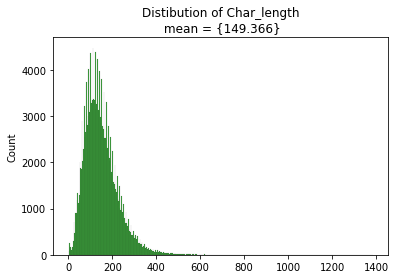

In [87]:
sns.histplot(data=char_length , color="g")
plt.title("Distibution of Char_length\n mean = {%1.3f}" %ave_char_length)

**max number of characters to have in our vocabulary**

---

*this will include all the alphabet chars and signs and symbols*

In [88]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [89]:
max_vocab_char = len(alphabet) + 2  # num characters in alphabet + space + OOV token
max_vocab_char

70

In [90]:
Char_vectorizer =TextVectorization(max_tokens= max_vocab_char ,
                                   standardize='lower_and_strip_punctuation', # "None" makes the vocab longer by inferring puntuations
                                    output_sequence_length=interval_95percent)

In [91]:
Char_vectorizer.adapt(train_char)

In [92]:
char_vocab = Char_vectorizer.get_vocabulary()

In [93]:
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


# **Character-level Embedding Layer**

In [94]:
len(char_vocab) , len(alphabet)

(28, 68)

In [95]:
from tensorflow.keras.layers import Embedding

Embedding_layer_3 = Embedding(input_dim= max_vocab_char , 
                              output_dim= 25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              )


*You can see below that the last weights are the same because the sentence had less characters than the input length of 290 and so, they are padded by zero (which end up with the same weights in Embedding Method)*

In [96]:
print(f"Charified text (before vectorization and embedding):\n{train_char[0]}\n")
char_embed_example = Embedding_layer_3(Char_vectorizer([train_char[0]]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .

Embedded chars (after vectorization and embedding):
[[[ 0.01862936  0.02420232 -0.00749583 ... -0.01496441 -0.00648283
   -0.03500345]
  [ 0.01524898  0.01219652  0.00417473 ...  0.02261705  0.00461168
    0.02905554]
  [-0.01719129 -0.03516756  0.01907369 ...  0.0174122   0.01205716
    0.00927241]
  ...
  [ 0.03048195  0.0070172   0.04620581 ... -0.01049459  0.022221
   -0.004200

# **Model_3: CONV 1D (with character Embedding)**

**if `GlobalAveragePooling1D` did not work try `MaxPool1D` as well**

**`TextVectorizer` has `standardization` that can be changes to `None` to see what happend**

**Number of layers can also be changed**

In [97]:
from tensorflow.keras.layers import Conv1D , GlobalAveragePooling1D , Dense , Input , MaxPool1D , GlobalMaxPooling1D

**if `GlobalAveragePooling1D` did not work try `MaxPool1D` as well**

In [98]:
Inputs = Input(shape=(1,) , dtype = 'string')
x = Char_vectorizer(Inputs)
x = Embedding_layer_3(x)
x = Conv1D(filters = 64 , kernel_size=5 , strides=1,
           padding='same', activation='relu')(x)
x = GlobalMaxPooling1D()(x)
Outputs = Dense(5 , activation='softmax')(x)

model_3 = tf.keras.Model(Inputs , Outputs)

In [99]:
model_3.compile(optimizer="Adam", loss= 'categorical_crossentropy', 
                metrics=['accuracy'])

In [100]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [101]:
# history_3 = model_3.fit(train_data, epochs=5, 
                        # steps_per_epoch= int(0.1*len(train_data)), 
                        # validation_data = validation_data, validation_steps = int(0.1*len(validation_data)))

*The reason that this does not work well is that the dataset is not in the correct format. So, we'll create char-level batched `PrefetchedDataset`'s. *

In [102]:
train_data_char = tf.data.Dataset.from_tensor_slices((train_char, lables_onehot_train)).batch(32).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data_char = tf.data.Dataset.from_tensor_slices((test_char, lables_onehot_test)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data_char = tf.data.Dataset.from_tensor_slices((validation_char, lables_onehot_validation)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [103]:
train_data_char

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [104]:
history_3 = model_3.fit(train_data_char, epochs=5, 
                        steps_per_epoch= int(0.1*len(train_data_char)), 
                        validation_data = validation_data_char, validation_steps = int(0.1*len(validation_data_char)))

Epoch 1/5
562/562 [==============================] - 4s 6ms/step - loss: 1.2498 - accuracy: 0.4991 - val_loss: 1.0180 - val_accuracy: 0.6070
Epoch 2/5
562/562 [==============================] - 3s 5ms/step - loss: 0.9869 - accuracy: 0.6074 - val_loss: 0.9211 - val_accuracy: 0.6396
Epoch 3/5
562/562 [==============================] - 3s 5ms/step - loss: 0.9101 - accuracy: 0.6426 - val_loss: 0.8603 - val_accuracy: 0.6682
Epoch 4/5
562/562 [==============================] - 3s 5ms/step - loss: 0.8618 - accuracy: 0.6655 - val_loss: 0.8296 - val_accuracy: 0.6799
Epoch 5/5
562/562 [==============================] - 3s 5ms/step - loss: 0.8481 - accuracy: 0.6705 - val_loss: 0.8086 - val_accuracy: 0.6955


In [105]:
probs_3  = model_3.predict(validation_data_char)

In [106]:
probs_3[0]

array([0.20026651, 0.51615787, 0.08335698, 0.12611625, 0.07410237],
      dtype=float32)

In [107]:
preds_3 = tf.argmax(probs_3 , axis = 1)
preds_3[0]

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [108]:
result_3 = calculate_results(labels_validation , preds_3)
result_3

Confusion Matrix Result: 
 [[1266 1054  461  578   90]
 [ 580 2626  568  224  584]
 [ 257  292 8717  170  528]
 [ 405  492  325 1090   64]
 [ 148  782 1943   55 6913]]




{'accuracy': 0.6822454653779955,
 'f1': 0.6780872972818105,
 'precision': 0.6854325610555977,
 'recall': 0.6822454653779955}

# **Combining Character and Token Embeddings**

According to the paper, Figure 1 ,  hybrid token embedding layer is a combination of token embeddings and character embeddings. In other words, they create a stacked embedding to represent sequences before passing them to the sequence label prediction layer.
So, there different steps:
1. Creating a token-level model (Token Embeddings)
2. Create a character-level model (Character Embeddings)
3. Combine (using layers.Concatenate) the outputs of 1 and 2
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of Neural Networks for Joint Sentence Classification in Medical Paper Abstracts
5. Construct a model which takes token and character-level sequences as input and produces sequence label probabilities as output

**Token Embeddings**

In [109]:
import tensorflow_hub as hub

Token_Embeddings = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                                  input_shape = [], #input is some sort of strings
                                  dtype="string",
                                  trainable=False)

In [110]:
Inputs = tf.keras.layers.Input(shape = [], dtype=tf.string, name="Token_layer")
Token_layer = Token_Embeddings(Inputs)
Token_output = Dense(300, activation = 'relu')(Token_layer)

token_model = tf.keras.Model(Inputs, Token_output)

token_model. summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Token_layer (InputLayer)    [(None,)]                 0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 300)               153900    
                                                                 
Total params: 256,951,724
Trainable params: 153,900
Non-trainable params: 256,797,824
_________________________________________________________________


**Character Embeddings and concatenate with LSTM**

In [111]:
input = tf.keras.layers.Input(shape = (1,), dtype=tf.string, name="Char_layer")
Token_layer = Char_vectorizer(input)
Embed_Layer = Embedding_layer_3(Token_layer)
char_output = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(24))(Embed_Layer) #Character_based token embedding is 50(bidirectional)
# here we changes 25 to 24 because GPU works better with multiples of 8

Char_model = tf.keras.Model(input,char_output)
Char_model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Char_layer (InputLayer)     [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 290, 25)           1750      
                                                                 
 bidirectional (Bidirectiona  (None, 48)               9600      
 l)                                                              
                                                                 
Total params: 11,350
Trainable params: 11,350
Non-trainable params: 0
_________________________________________________________________


**Hybrid Token Embedding**

In [112]:
concat_layer = tf.keras.layers.Concatenate()([token_model.output , Char_model.output])

**Instead of the last bi-LSTM model, we are using a dense layer with 50% dropout**

In [113]:
dropout_layer_1 = tf.keras.layers.Dropout(0.5)(concat_layer)
dense_combine_layer = tf.keras.layers.Dense(128, activation= 'relu')(dropout_layer_1)
dropout_layer_2 = tf.keras.layers.Dropout(0.5)(dense_combine_layer)

output_layer = tf.keras.layers.Dense(len(class_names), activation='softmax')(dropout_layer_2)

model_4 = tf.keras.Model([token_model.input , Char_model.input], output_layer)
model_4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Char_layer (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Token_layer (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 290)         0           ['Char_layer[0][0]']             
 orization)                                                                                       
                                                                                                  
 keras_layer_1 (KerasLayer)     (None, 512)          256797824   ['Token_layer[0][0]']      

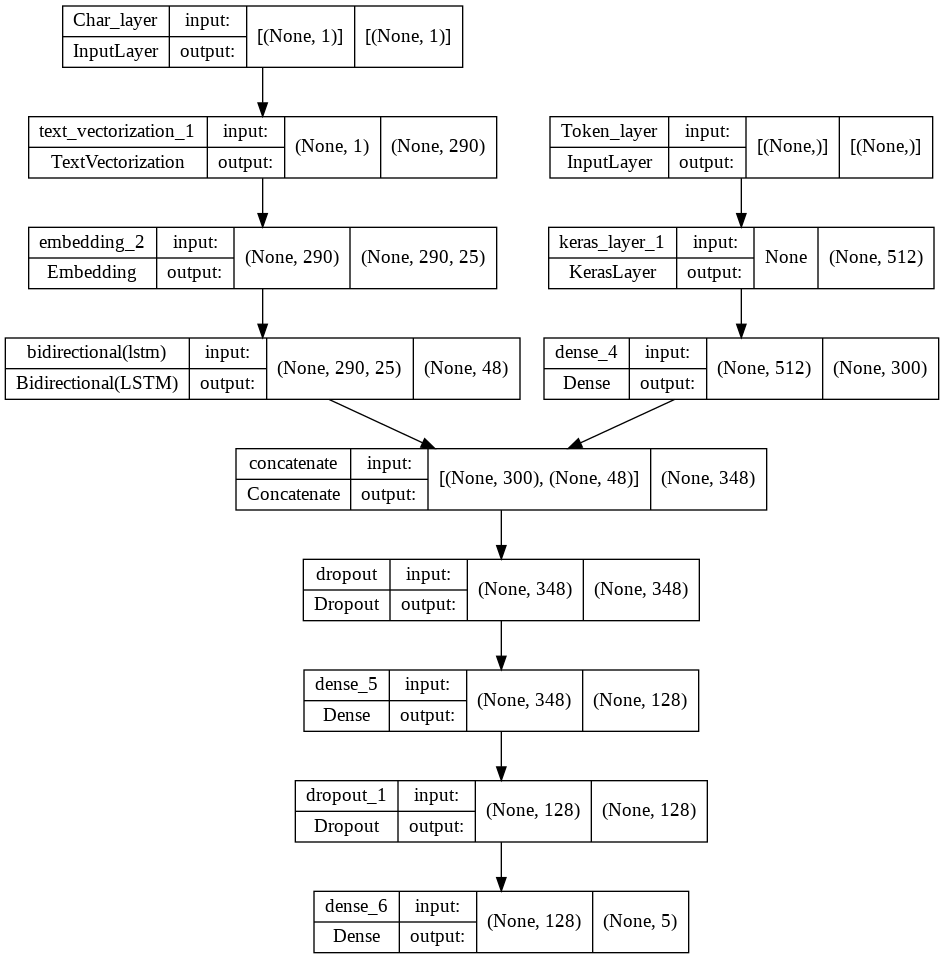

In [114]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)

# total


In [115]:
249 - (17+11+12+23+8+14)

164